<a href="https://colab.research.google.com/github/datadigger01/datamining/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns
%matplotlib inline

# K-Nearest Neighbor(kNN) 알고리즘

# 1. Forecasting/Regression

In [2]:
df = pd.read_csv('/content/drive/MyDrive/데이터마이닝수업/Data/BostonHousing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


## 1) 종속변수, 독립변수 설정

In [3]:
#타겟/종속변수
label =['MEDV']
#Feature/독립변수/설명변수
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

## 2) 학습(Train), 검증(Test) 데이터 분리

In [16]:
from sklearn.model_selection import train_test_split
# Split Data for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.25, random_state=365)
print("Train",X_train.shape)
print("Test",X_test.shape)

Train (379, 13)
Test (127, 13)


## 3) 모델링

+ kNN 알고리즘 import 및 hyperparamter 설정

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [70]:
neigh = KNeighborsRegressor(n_neighbors=3)

+ 학습(Training)

In [65]:
kNN_model=neigh.fit(X_train, y_train)

+ 학습된 모델로 예측

In [66]:
predicted_value = kNN_model.predict(X_test)
predicted_value

array([[22.25 ],
       [23.05 ],
       [36.425],
       [36.425],
       [33.8  ],
       [22.725],
       [17.4  ],
       [11.05 ],
       [20.875],
       [31.95 ],
       [39.1  ],
       [21.8  ],
       [20.425],
       [22.55 ],
       [30.9  ],
       [11.9  ],
       [10.85 ],
       [19.95 ],
       [13.8  ],
       [18.25 ],
       [24.8  ],
       [20.55 ],
       [19.975],
       [24.55 ],
       [26.425],
       [25.725],
       [12.325],
       [13.3  ],
       [24.8  ],
       [33.975],
       [33.8  ],
       [10.725],
       [19.225],
       [21.05 ],
       [13.875],
       [22.85 ],
       [17.95 ],
       [19.2  ],
       [28.9  ],
       [14.175],
       [20.7  ],
       [31.45 ],
       [12.325],
       [29.2  ],
       [20.725],
       [20.425],
       [26.425],
       [23.475],
       [24.025],
       [10.775],
       [22.025],
       [25.55 ],
       [40.55 ],
       [12.1  ],
       [22.45 ],
       [17.275],
       [21.375],
       [28.4  ],
       [34.5  

+ 예측된 결과와 실제값 비교

In [67]:
y_test_re = y_test.reset_index(drop=True)
result_com=pd.concat([y_test_re, pd.DataFrame(predicted_value, columns=['kNN_pred_MEDV'])], axis=1)
result_com

,MEDV,kNN_pred_MEDV
0,15.3,22.250
1,25.0,23.050
2,41.7,36.425
3,50.0,36.425
4,34.9,33.800
...,...,...
122,13.6,15.175
123,5.0,9.225
124,35.4,31.350
125,37.3,34.300


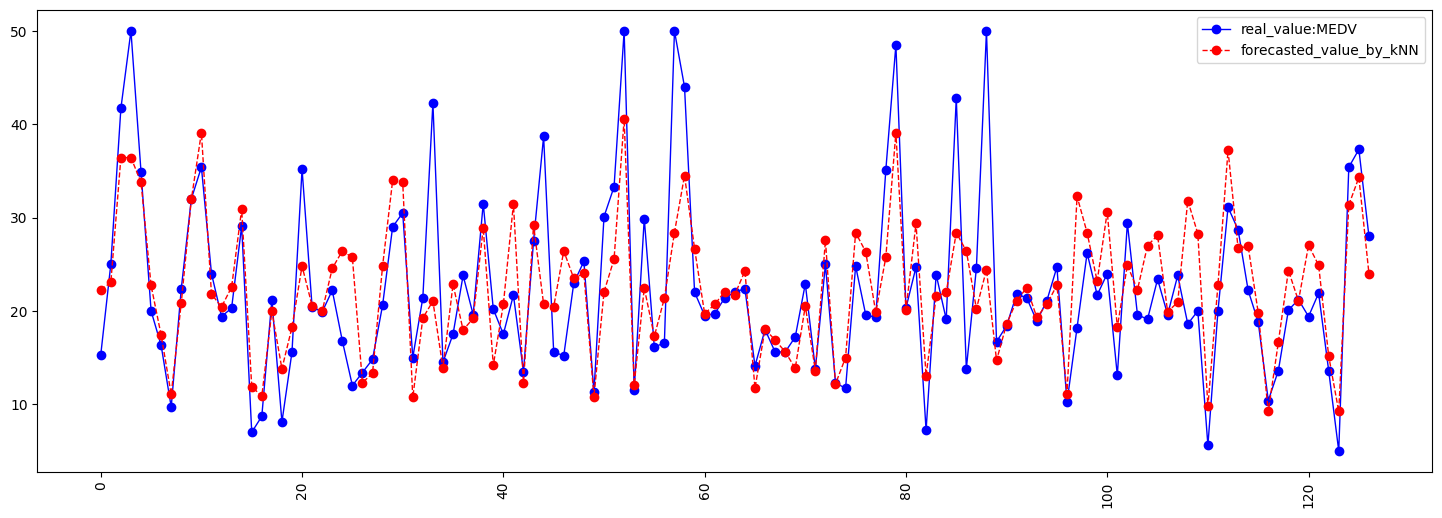

In [68]:
plt.figure(figsize=(18,6))

# 실제값 Plot
plt.plot(result_com['MEDV'], marker='o',markersize=6,color='blue',linewidth=1,label='real_value:MEDV' )
# 예측값 Plot
plt.plot(result_com['kNN_pred_MEDV'], marker='o',markersize=6,color='red', linestyle='dashed', linewidth=1,label='forecasted_value_by_kNN')

plt.legend()
plt.xticks(rotation=90)
plt.show()

## 4) 예측모형의 성능평가
   + MAE(Mean Absolute Error)
   + MSE(Mean Squared Error)
   + MAPE(Mean Absolute Percentage Error)
   + RMSE(Root Mean Squared Error)

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [69]:
print("MAE  :", mean_absolute_error(predicted_value, y_test))
print("MAPE :", mean_absolute_percentage_error(predicted_value, y_test))
print("MSE  :", mean_squared_error(predicted_value, y_test))
print("RMSE :", mean_squared_error(predicted_value, y_test)**0.5)

MAE  : 4.3383858267716535
MAPE : 0.18880105998857472
MSE  : 40.58197342519686
RMSE : 6.370398215590361


# 2) Classification(분류)

In [72]:
df1 = pd.read_csv('/content/drive/MyDrive/데이터마이닝수업/Data/default_credit_card.csv')
df1

,Cust_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_YN
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## 1) 종속변수, 독립변수 설정

In [73]:
# predicators(feature) & target(label)
features = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3']
label = ['default_YN']

## 2) 학습(Train), 검증(Test) 데이터 분리

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.3, random_state=3245)
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
15893,150000,2,1,2,29,0,0,0,110018,47600,26219,2400,1619,2550
20044,20000,2,3,1,35,0,0,0,19792,19995,20269,1339,1500,1290
8306,200000,2,1,2,36,-2,-2,-2,0,0,0,0,0,932
3559,200000,2,1,2,33,-1,-1,-1,165,145,-20,145,0,631
26811,100000,1,2,2,28,-1,-1,-1,942,390,390,390,390,390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25772,420000,2,2,1,33,0,0,0,52018,60519,67083,10000,10083,10094
4334,50000,2,3,1,58,0,0,0,50019,18458,19318,1400,1229,687
25080,30000,1,1,1,52,0,0,0,14476,15297,8531,1129,1152,1081
21429,500000,2,1,2,25,1,-1,-1,-46,9412,1260,9458,1260,0


## 3). 모델링

+ 분류를 위한 kNN 알고리즘 import 및 hyperparameter 설정

In [84]:
from sklearn.neighbors import KNeighborsClassifier

+ 학습(Training)

In [174]:
neigh_clf_model = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


+ 학습된 모델을 기반으로 예측

In [175]:
pred_value = neigh_clf_model.predict(X_test)
pred_probability = neigh_clf_model.predict_proba(X_test)
print(pred_probability)
print(pred_probability[:,1])

[[1.   0.  ]
 [0.55 0.45]
 [0.75 0.25]
 ...
 [0.75 0.25]
 [0.75 0.25]
 [0.65 0.35]]
[0.   0.45 0.25 ... 0.25 0.25 0.35]


In [176]:
y_test_re = y_test.reset_index(drop=True)
result_clf=pd.concat([y_test_re, pd.DataFrame(pred_value, columns=['kNN_pred_default_YN']), pd.DataFrame(pred_probability[:,1], columns=['kNN_pred_prob'])], axis=1)

result_clf

,default_YN,kNN_pred_default_YN,kNN_pred_prob
0,0,0,0.00
1,1,0,0.45
2,0,0,0.25
3,0,0,0.00
4,1,0,0.45
...,...,...,...
8995,0,0,0.15
8996,1,0,0.25
8997,0,0,0.25
8998,1,0,0.25


## 4) 모델 성능평가

In [177]:
from sklearn.metrics import confusion_matrix

print(y_test.value_counts())
print(confusion_matrix(y_test, pred_value, normalize='true'))

default_YN
0             7028
1             1972
dtype: int64
[[0.98150256 0.01849744]
 [0.93559838 0.06440162]]


+ Confusion Matrix

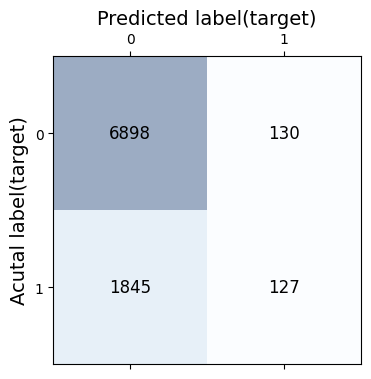

In [178]:
con_m = confusion_matrix(y_test, pred_value, normalize=None)  # normalize=c('true','pred','all'), None

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(con_m, cmap=plt.cm.Blues, alpha=0.4)
for i in range(con_m.shape[0]):
    for j in range(con_m.shape[1]):
        ax.text(x=j,y=i,s=np.round(con_m[i,j],3),va='center',ha='center', fontsize=12)
#plt.xlabel('predicted label(target)',fontsize=14)
plt.ylabel('Acutal label(target)', fontsize=14)
plt.title("Predicted label(target)",fontsize=14)
plt.show()

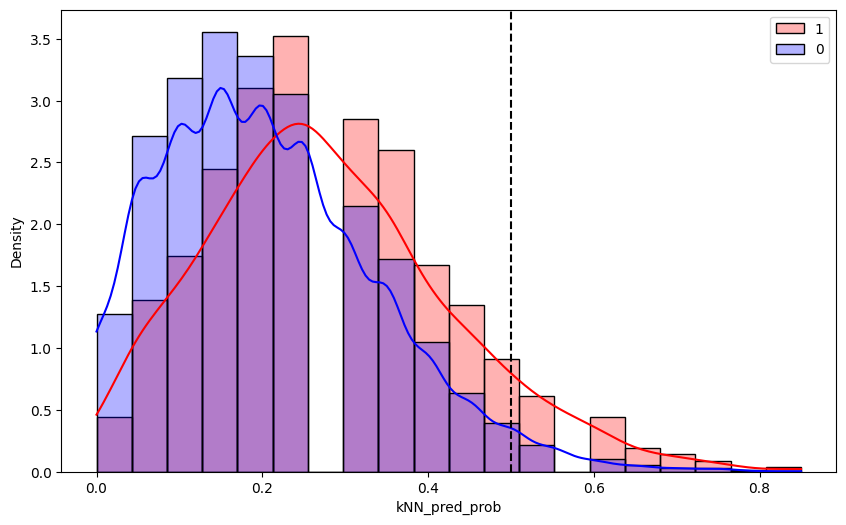

In [179]:
plt.figure(figsize=(10,6))
#plt.style.use('ggplot')

sns.histplot(data=result_clf.query('default_YN==1')['kNN_pred_prob'], stat='density', kde='True',bins=20, color='red', alpha=0.3, label='1')
sns.histplot(data=result_clf.query('default_YN==0')['kNN_pred_prob'], stat='density', kde='True',bins=20, color='blue', alpha=0.3, label='0')

plt.axvline(0.5, linestyle ='--', color='black')

plt.legend()
plt.show()

+ ROC 및 AUC

In [180]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

In [181]:
# Baseline setting
ns_probs = [0 for _ in range(len(X_test))]
ns_fpr,ns_tpr,_= roc_curve(y_test, ns_probs)

In [182]:
mdl_fpr,mdl_tpr,threshold=roc_curve(y_test, pred_probability[:,1])

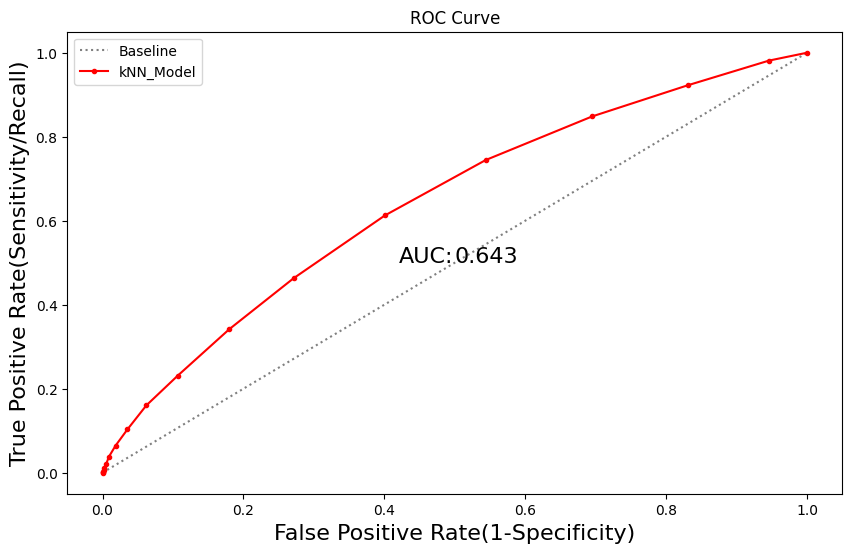

In [183]:
plt.figure(figsize=(10,6))
plt.title("ROC Curve")
plt.plot(ns_fpr, ns_tpr,linestyle=':',color='gray', label='Baseline')
plt.plot(mdl_fpr, mdl_tpr,marker='.', color='red',label='kNN_Model')

plt.text(0.5, 0.5, np.round(roc_auc_score(y_test, pred_probability[:,1]),3), fontsize=16)
plt.text(0.42, 0.5, "AUC:", fontsize=16)
plt.xlabel('False Positive Rate(1-Specificity)', fontsize=16)
plt.ylabel('True Positive Rate(Sensitivity/Recall)', fontsize=16)

plt.legend()
plt.show()

In [185]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Recall   : ", recall_score(y_test, pred_value))
print("Precision: ", precision_score(y_test, pred_value))
print("F1-Score  :", f1_score(y_test, pred_value))

Recall   :  0.06440162271805273
Precision:  0.49416342412451364
F1-Score  : 0.11395244504262002
